In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
org_train_data = pd.read_csv("data/Tabular Playground Series - Apr 2021/train.csv")
org_test_data = pd.read_csv("data/Tabular Playground Series - Apr 2021/test.csv")

In [3]:
org_train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
org_test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [5]:
# Check for Null data

In [6]:
org_train_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [7]:
org_test_data.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age             3487
SibSp              0
Parch              0
Ticket          5181
Fare             133
Cabin          70831
Embarked         277
dtype: int64

In [8]:
# Check % of Null data

In [9]:
def missingdata(data):
  total = data.isnull().sum().sort_values(ascending = False)
  percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending = False)
  ms = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
  ms = ms[ms["Percent"] > 0]
  f, ax = plt.subplots(figsize=(8, 6))
  plt.xticks(rotation="90")

  fig = sns.barplot(ms.index, ms["Percent"], color="green", alpha=0.8)
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('Percent of missing values', fontsize=15)
  plt.title('Percent missing data by feature', fontsize=15)
  return ms

,Total,Percent
Cabin,67866,67.866
Ticket,4623,4.623
Age,3292,3.292
Embarked,250,0.250
Fare,134,0.134


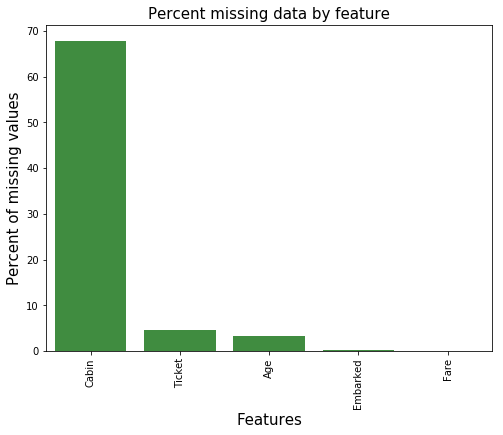

In [10]:
missingdata(org_train_data)

,Total,Percent
Cabin,70831,70.831
Ticket,5181,5.181
Age,3487,3.487
Embarked,277,0.277
Fare,133,0.133


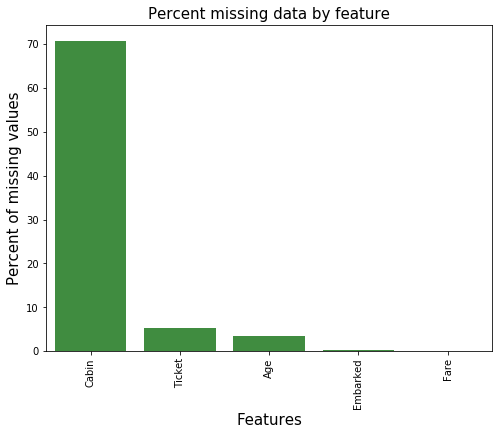

In [11]:
missingdata(org_test_data)

In [12]:
# Drop unnecessary columns. Cabin has 70% Null values in bothe Train and Test data.

In [13]:
# Drop from Train Dataset

org_train_data.drop(["PassengerId", "Cabin"], axis=1, inplace=True)
org_train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,S
9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,C


In [14]:
# Drop from Test Dataset
org_test_pssg_id = org_test_data["PassengerId"]
org_test_data.drop(["PassengerId", "Cabin"], axis=1, inplace=True)
org_test_data.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,S
1,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,S
2,1,"Harris, Heather",female,19.0,0,0,25990,38.91,C
3,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,S
4,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,C
5,3,"Orabuena, John",male,34.0,0,0,NaN,10.40,C
6,1,"Guerrero, Angel",female,48.0,1,2,PC 28237,221.94,S
7,3,"Payton, Brian",male,13.0,0,0,42031,9.41,S
8,3,"Murray, Barbara",female,16.0,1,0,C.A. 219645,12.31,S
9,3,"Mickle, Johnny",male,20.0,0,0,39023,6.17,S


In [15]:
def fill_age(data):
  # Populate Missing Age - Has SibSp and Parch
  # Age for passanger travelling with SibSp and Parch

  # Find Median Age for passanger travelling with SibSp and Parch
  age_median_sibsp_parch = data[(data["Parch"] > 0) & (data["SibSp"] > 0)]["Age"].median()

  # Populate Age for passanger travelling with SibSp and Parch where Age is Null
  data.loc[(data["Parch"] > 0) & (data["SibSp"] > 0) & (data["Age"].isnull()), "Age"] = age_median_sibsp_parch

  # Populate Missing Age - Has SibSp and NO Parch
  # Age for passanger travelling with SibSp and NO Parch

  # Find Median Age for passanger travelling with SibSp and NO Parch
  age_median_sibsp_no_parch = data[(data["Parch"] == 0) & (data["SibSp"] > 0)]["Age"].median()

  # Populate Age for passanger travelling with SibSp and NO Parch where Age is Null
  data.loc[(data["Parch"] == 0) & (data["SibSp"] > 0) & (data["Age"].isnull()), "Age"] = age_median_sibsp_no_parch

  # Populate Missing Age - Has NO SibSp and NO Parch
  # Age for passanger travelling with NO SibSp and NO Parch

  # Find Median Age for passanger travelling with NO SibSp and NO Parch
  age_median_no_sibsp_no_parch = data[(data["Parch"] == 0) & (data["SibSp"] == 0)]["Age"].median()

  # Populate Age for passanger travelling with NO SibSp and NO Parch where Age is Null
  data.loc[(data["Parch"] == 0) & (data["SibSp"] == 0) & (data["Age"].isnull()), "Age"] = age_median_no_sibsp_no_parch

  # Populate Missing Age - Has NO SibSp and Has Parch
  # Age for passanger travelling with NO SibSp and Has Parch

  # Find Median Age for passanger travelling with NO SibSp and Has Parch
  age_median_no_sibsp_no_parch = data[(data["Parch"] > 0) & (data["SibSp"] == 0)]["Age"].median()

  # Populate Age for passanger travelling with NO SibSp and Has Parch where Age is Null
  data.loc[(data["Parch"] > 0) & (data["SibSp"] == 0) & (data["Age"].isnull()), "Age"] = age_median_no_sibsp_no_parch

  return data

In [16]:
# Fill Age for Train and Test Dataset
org_train_data = fill_age(org_train_data)
org_test_data = fill_age(org_test_data)

In [17]:
# Create bin for age features

# Train Dataset
org_train_data['Age_Bin'] = pd.cut(org_train_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

# Test Dataset
org_test_data['Age_Bin'] = pd.cut(org_test_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [18]:
def encode_age_bin(data):
 return pd.get_dummies(data["Age_Bin"], drop_first=True)

train_age_bin = encode_age_bin(org_train_data)
test_age_bin = encode_age_bin(org_test_data)

In [19]:
org_train_data.drop(["Age", "Age_Bin"], axis=1, inplace=True)
org_test_data.drop(["Age", "Age_Bin"], axis=1, inplace=True)

In [20]:
# Fill Fare for Test and Train Dataset
org_train_data['Fare'].fillna(org_train_data['Fare'].mode()[0], inplace = True)
org_test_data['Fare'].fillna(org_train_data['Fare'].mode()[0], inplace = True)

In [21]:
# Create bin for fare features
# Train Dataset
org_train_data['Fare_Bin'] = pd.cut(org_train_data['Fare'], bins=[0,7.91,14.45,31,1000], labels=['Low_Fare','Median_Fare',
                                                                                      'Average_Fare','High_Fare'])

# Test Dataset
org_test_data['Fare_Bin'] = pd.cut(org_test_data['Fare'], bins=[0,7.91,14.45,31,1000], labels=['Low_Fare','Median_Fare',
                                                                                      'Average_Fare','High_Fare'])


In [22]:
def encode_fare_bin(data):
  return pd.get_dummies(org_train_data["Fare_Bin"], drop_first=True)

train_fare_bin = encode_fare_bin(org_train_data)
test_fare_bin = encode_fare_bin(org_test_data)

In [23]:
# Update Train Dataset
org_train_data = pd.concat([org_train_data, train_age_bin, train_fare_bin], axis = 1)
org_test_data = pd.concat([org_test_data, test_age_bin, test_fare_bin], axis = 1)

org_train_data.drop(["Fare", "Fare_Bin"], axis=1, inplace=True)
org_test_data.drop(["Fare", "Fare_Bin"], axis=1, inplace=True)

In [24]:
# Check for Tickets and add Has_ticket
org_train_data["Has_Ticket"] = np.where(org_train_data["Ticket"].isnull(), 0, 1)
org_test_data["Has_Ticket"] = np.where(org_test_data["Ticket"].isnull(), 0, 1)

# Drop Ticket
org_train_data.drop("Ticket", axis=1, inplace=True)
org_test_data.drop("Ticket", axis=1, inplace=True)

In [25]:
# Fill Embarked for Test and Train Dataset
org_train_data['Embarked'].fillna(org_train_data['Embarked'].mode()[0], inplace = True)
org_test_data['Embarked'].fillna(org_train_data['Embarked'].mode()[0], inplace = True)

In [26]:
# Apply One Hot Encoding to Train Dataset

In [27]:
# Sex
def encode_sex(data):
  return pd.get_dummies(data["Sex"], drop_first=True)

train_sex = encode_sex(org_train_data)
test_sex = encode_sex(org_test_data)

In [28]:
# Pclass
def encode_pclass(data):
  return pd.get_dummies(data["Pclass"], drop_first=True)

train_pclass = encode_pclass(org_train_data)
test_pclass = encode_pclass(org_test_data)

In [29]:
# Embarked
def encode_embarked(data):
  return pd.get_dummies(org_train_data["Embarked"], drop_first=True)

train_embarked = encode_embarked(org_train_data)
test_embarked = encode_embarked(org_test_data)

In [30]:
# Add Encoded Sex, embarked, pclass to Train Dataset
org_train_data = pd.concat([org_train_data, train_sex, train_embarked, train_pclass], axis = 1)
org_test_data = pd.concat([org_test_data, test_sex, test_embarked, test_pclass], axis = 1)

In [31]:
# Drop Sex, embarked, pclass to Train Dataset
org_train_data.drop(["Pclass", "Sex", "Embarked"], axis=1, inplace=True)
org_test_data.drop(["Pclass", "Sex", "Embarked"], axis=1, inplace=True)

In [32]:
# Calculate Family Size
org_train_data["Family_Size"] = org_train_data["SibSp"] + org_train_data["Parch"] + 1
org_test_data["Family_Size"] = org_test_data["SibSp"] + org_test_data["Parch"] + 1

In [33]:
# Create Bin for Family Size
org_train_data['Family_Bin'] = pd.cut(org_train_data['Family_Size'], bins=[0,1,3,5,20], labels=['Single_Family','Median_Family',
                                                                                      'Average_Family','Big_Family'])

org_test_data['Family_Bin'] = pd.cut(org_test_data['Family_Size'], bins=[0,1,3,5,20], labels=['Single_Family','Median_Family',
                                                                                      'Average_Family','Big_Family'])

In [34]:
def encode_family_bin(data):
  return pd.get_dummies(data["Family_Bin"], drop_first=True)

train_family_bin = encode_family_bin(org_train_data)
test_family_bin = encode_family_bin(org_test_data)

In [35]:
org_train_data = pd.concat([org_train_data, train_family_bin], axis = 1)
org_test_data = pd.concat([org_test_data, test_family_bin], axis = 1)

In [36]:
# Drop unnecessary columns
org_train_data.drop(["Family_Size", "Family_Bin", "Name"], axis=1, inplace=True)
org_test_data.drop(["Family_Size", "Family_Bin", "Name"], axis=1, inplace=True)

In [37]:
org_train_data.head(5)

,Survived,SibSp,Parch,Teenage,Adult,Elder,Median_Fare,Average_Fare,High_Fare,Has_Ticket,male,Q,S,2,3,Median_Family,Average_Family,Big_Family
0,1,2,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0
2,0,1,2,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0
3,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0


In [38]:
org_test_data.head(5)

,SibSp,Parch,Teenage,Adult,Elder,Median_Fare,Average_Fare,High_Fare,Has_Ticket,male,Q,S,2,3,Median_Family,Average_Family,Big_Family
0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0
1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0
4,0,2,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [39]:
training_feature = org_train_data.drop("Survived", axis=1)
training_target = org_train_data["Survived"]


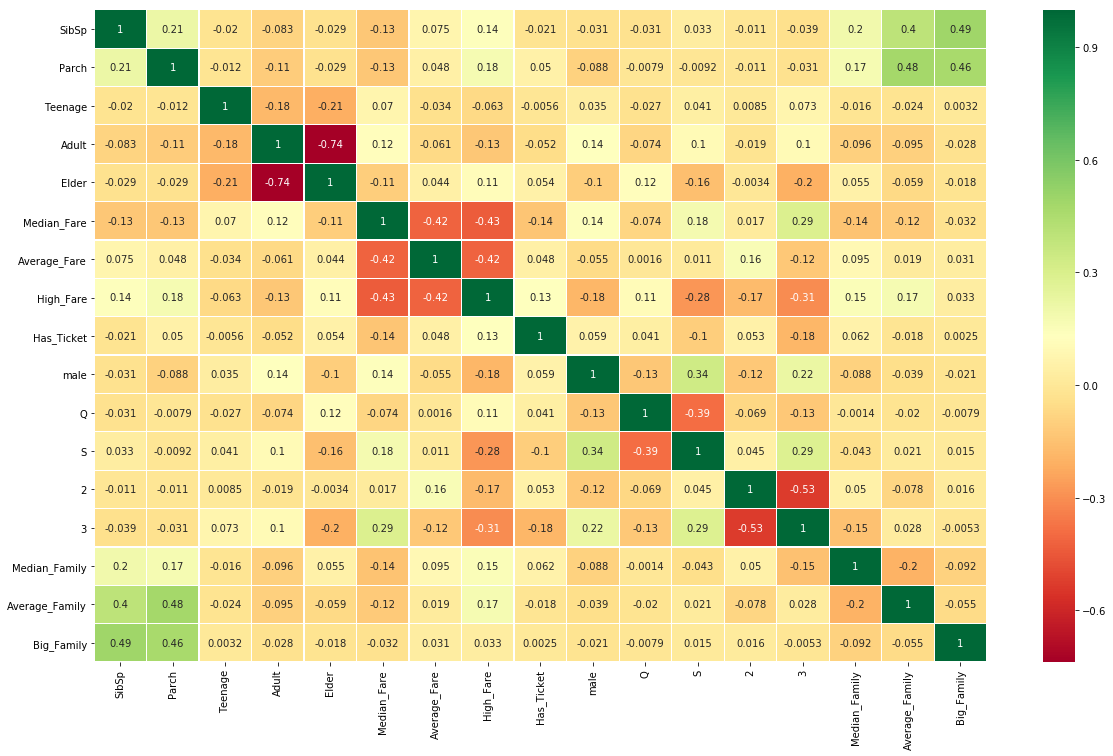

In [40]:
sns.heatmap(training_feature.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit_transform(training_feature)

/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.85761787, -0.47844837, -0.22557436, ...,  1.73200462,
        -0.34578908, -0.15900783],
       [-0.46105688, -0.47844837, -0.22557436, ..., -0.57736567,
        -0.34578908, -0.15900783],
       [ 0.69828049,  1.6266571 , -0.22557436, ..., -0.57736567,
         2.89193635, -0.15900783],
       ...,
       [-0.46105688, -0.47844837, -0.22557436, ..., -0.57736567,
        -0.34578908, -0.15900783],
       [-0.46105688,  0.57410437, -0.22557436, ...,  1.73200462,
        -0.34578908, -0.15900783],
       [-0.46105688, -0.47844837, -0.22557436, ..., -0.57736567,
        -0.34578908, -0.15900783]])

In [42]:
training_target

0        1
1        0
2        0
3        0
4        1
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       1
14       1
15       1
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       1
24       0
25       0
26       0
27       1
28       1
29       0
        ..
99970    1
99971    0
99972    0
99973    0
99974    0
99975    0
99976    1
99977    0
99978    0
99979    0
99980    0
99981    1
99982    0
99983    1
99984    1
99985    1
99986    0
99987    0
99988    1
99989    1
99990    1
99991    0
99992    1
99993    1
99994    0
99995    1
99996    0
99997    0
99998    0
99999    0
Name: Survived, Length: 100000, dtype: int64

In [43]:
training_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
SibSp             100000 non-null int64
Parch             100000 non-null int64
Teenage           100000 non-null uint8
Adult             100000 non-null uint8
Elder             100000 non-null uint8
Median_Fare       100000 non-null uint8
Average_Fare      100000 non-null uint8
High_Fare         100000 non-null uint8
Has_Ticket        100000 non-null int64
male              100000 non-null uint8
Q                 100000 non-null uint8
S                 100000 non-null uint8
2                 100000 non-null uint8
3                 100000 non-null uint8
Median_Family     100000 non-null uint8
Average_Family    100000 non-null uint8
Big_Family        100000 non-null uint8
dtypes: int64(3), uint8(14)
memory usage: 3.6 MB


In [44]:
org_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
SibSp             100000 non-null int64
Parch             100000 non-null int64
Teenage           100000 non-null uint8
Adult             100000 non-null uint8
Elder             100000 non-null uint8
Median_Fare       100000 non-null uint8
Average_Fare      100000 non-null uint8
High_Fare         100000 non-null uint8
Has_Ticket        100000 non-null int64
male              100000 non-null uint8
Q                 100000 non-null uint8
S                 100000 non-null uint8
2                 100000 non-null uint8
3                 100000 non-null uint8
Median_Family     100000 non-null uint8
Average_Family    100000 non-null uint8
Big_Family        100000 non-null uint8
dtypes: int64(3), uint8(14)
memory usage: 3.6 MB


**Model**

Now we are ready to train a model and predict the required solution. There are lot of predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Linear Discriminant Analysis
- Ada Boost Classifier
- Gradient Boosting Classifier

And also compared above given classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure and plot accuracy based confusion matrix

## Split Data to Test and Train

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
x_train, x_test, y_train, y_test = train_test_split(training_feature, training_target, test_size=0.2, random_state=42)

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80000, 17), (20000, 17), (80000,), (20000,))

## Logistic Regression

/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------- The Accuracy of the model ----------------------------
The Accuracy of the Logistic Regression is 77.28


/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/g

The cross validated score for Logistic Regression is: 77.17


/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/g

Text(0.5, 1.05, 'Logistic Regression Confusion Matrix')

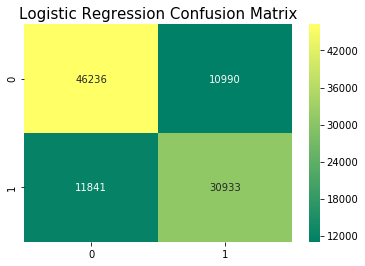

In [48]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
lr_prediction = logistic_regression.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the Logistic Regression is', round(accuracy_score(y_test, lr_prediction) * 100, 2))

# k=10, split the data into 10 equal parts
kfold = KFold(n_splits=10, shuffle=True, random_state=22)

lr_cv_score = cross_val_score(logistic_regression, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for Logistic Regression is:', round(lr_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(logistic_regression, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('Logistic Regression Confusion Matrix', y=1.05, size=15)


## LogisticRegression HyperParameter Tuning

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()

kfold = KFold(n_splits=10, shuffle=True, random_state=22)

param_grid = {"penalty": ["l2", "l1"],
              "C": [100, 10, 1.0, 0.1, 0.01],
              }

lr_model = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=kfold, n_jobs=4, scoring="accuracy")

lr_model.fit(x_train, y_train)

# Best score
print(lr_model.best_score_)

# Best Estimator
lr_model.best_estimator_


/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.77185


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## LogisticRegression with Best Parameters

/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------- The Accuracy of the model ----------------------------
The Accuracy of the Logistic Regression is 77.3


/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/g

The cross validated score for Logistic Regression is: 77.21


/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajendrasahu/opt/anaconda3/envs/datasciencebasics/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/g

Text(0.5, 1.05, 'Logistic Regression Confusion Matrix')

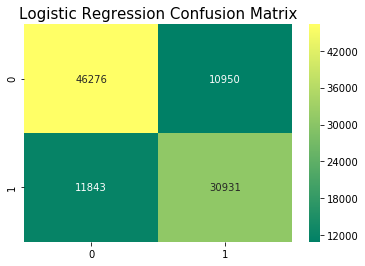

In [50]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

logistic_regression.fit(x_train, y_train)

lr_prediction = logistic_regression.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the Logistic Regression is', round(accuracy_score(y_test, lr_prediction) * 100, 2))

# k=10, split the data into 10 equal parts
kfold = KFold(n_splits=10, shuffle=True, random_state=22)

lr_cv_score = cross_val_score(logistic_regression, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for Logistic Regression is:', round(lr_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(logistic_regression, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('Logistic Regression Confusion Matrix', y=1.05, size=15)



## RandomForestClassifier Hyper-Parameter Tunning

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier()

n_estimator = range(500, 800, 100)

param_grid = {"n_estimators": n_estimator}

# k=10, split the data into 10 equal parts
kfold = KFold(n_splits=10, shuffle=True, random_state=22)

rf_classisier_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

rf_classisier_cv.fit(x_train, y_train)


# Best score
print(rf_classisier_cv.best_score_)

# Best Estimator
rf_classisier_cv.best_estimator_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  8.9min finished


0.767425


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## RandomForestClassifier with Best Parameters

-------------- The Accuracy of the model ----------------------------
The Accuracy of the Random Forest is 77.09
The cross validated score for Random Forest is: 76.99


Text(0.5, 1.05, 'Random Forest Confusion Matrix')

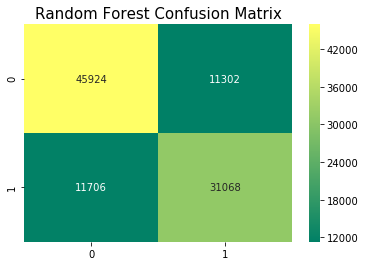

In [52]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
random_forest.fit(x_train, y_train)

rf_prediction = random_forest.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the Random Forest is', round(accuracy_score(y_test, rf_prediction) * 100, 2))

# k=10, split the data into 10 equal parts
kfold = KFold(n_splits=10, shuffle=True, random_state=22)

rf_cv_score = cross_val_score(random_forest, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for Random Forest is:', round(rf_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(random_forest, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('Random Forest Confusion Matrix', y=1.05, size=15)


## Support Vector Machines

In [53]:
# from sklearn.svm import SVC, LinearSVC

# svc = SVC()
# svc.fit(x_train, y_train)
# svc_prediction = svc.predict(x_test)

# print('-------------- The Accuracy of the model ----------------------------')
# print('The Accuracy of the SVC is', round(accuracy_score(y_test, svc_prediction) * 100, 2))

# # k=10, split the data into 10 equal parts
# kfold = KFold(n_splits=10, shuffle=True, random_state=22)

# svc_cv_score = cross_val_score(svc, training_feature, training_target, cv=kfold, scoring='accuracy')

# print('The cross validated score for SVC is:', round(svc_cv_score.mean() * 100, 2))

# y_pred = cross_val_predict(svc, training_feature, training_target, cv=kfold)

# sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

# plt.title('SVC Confusion Matrix', y=1.05, size=15)


## Decision Tree

-------------- The Accuracy of the model ----------------------------
The Accuracy of the Decision Tree is 76.81
The cross validated score for Decision Tree is: 76.8


Text(0.5, 1.05, 'Decision Tree Confusion Matrix')

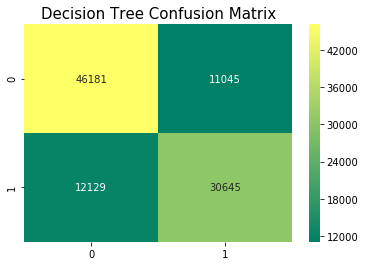

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')

dt_classifier.fit(x_train, y_train)

dt_prediction = dt_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the Decision Tree is', round(accuracy_score(y_test, dt_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

dt_cv_score = cross_val_score(dt_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for Decision Tree is:', round(dt_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(dt_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('Decision Tree Confusion Matrix', y=1.05, size=15)




## Decision Tree HyperParameter Tuning

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {"max_depth": [5, 10, 15],
              "max_features": [5, 10, 17]
}

dt_model = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=kfold, n_jobs=4, scoring="accuracy")

dt_model.fit(x_train, y_train)

# Best score
print(dt_model.best_score_)

# Best Estimator
dt_model.best_estimator_

0.7706625


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## DecesionTree with Best parameters

-------------- The Accuracy of the model ----------------------------
The Accuracy of the Decision Tree is 77.14
The cross validated score for Decision Tree is: 77.1


Text(0.5, 1.05, 'Decision Tree Confusion Matrix')

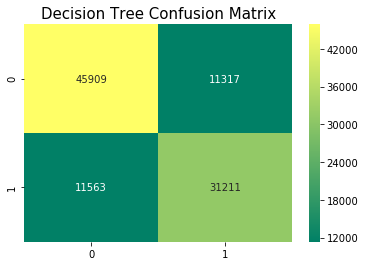

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

dt_classifier.fit(x_train, y_train)

dt_prediction = dt_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the Decision Tree is', round(accuracy_score(y_test, dt_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

dt_cv_score = cross_val_score(dt_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for Decision Tree is:', round(dt_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(dt_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('Decision Tree Confusion Matrix', y=1.05, size=15)

## AdaBoost

-------------- The Accuracy of the model ----------------------------
The Accuracy of the ADA Boost Classifier is 77.24
The cross validated score for ADA Boost Classifier is: 77.17


Text(0.5, 1.05, 'ADA Boost Classifier Confusion Matrix')

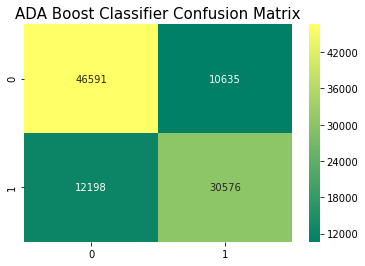

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)
ada_prediction = ada_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the ADA Boost Classifier is', round(accuracy_score(y_test, ada_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

ada_cv_score = cross_val_score(ada_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for ADA Boost Classifier is:', round(ada_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(ada_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('ADA Boost Classifier Confusion Matrix', y=1.05, size=15)

## AdaBoost Hyperparameter Tuning

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_classifier = AdaBoostClassifier()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {"n_estimators": [50, 100, 200],
              "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5]    
}

ada_model = GridSearchCV(ada_classifier, param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

ada_model.fit(x_train, y_train)

# Best score
print(ada_model.best_score_)

# Best Estimator
ada_model.best_estimator_



Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  6.1min finished


0.7720125


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=200, random_state=None)

## AdaBoostClassifier with Best Paramaters

-------------- The Accuracy of the model ----------------------------
The Accuracy of the ADA Boost Classifier is 77.3
The cross validated score for ADA Boost Classifier is: 77.2


Text(0.5, 1.05, 'ADA Boost Classifier Confusion Matrix')

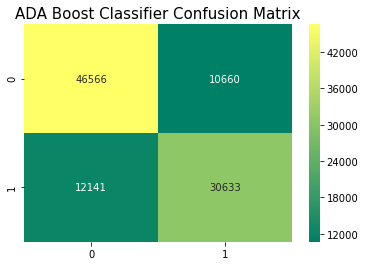

In [59]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=200, random_state=None)

ada_classifier.fit(x_train, y_train)
ada_prediction = ada_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the ADA Boost Classifier is', round(accuracy_score(y_test, ada_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

ada_cv_score = cross_val_score(ada_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for ADA Boost Classifier is:', round(ada_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(ada_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('ADA Boost Classifier Confusion Matrix', y=1.05, size=15)

## Linear Discriminant Analysis

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
-------------- The Accuracy of the model ----------------------------
The Accuracy of the LDA Classifier is 77.45
The cross validated score for LDA Classifier is: 77.24


Text(0.5, 1.05, 'LDA Classifier Confusion Matrix')

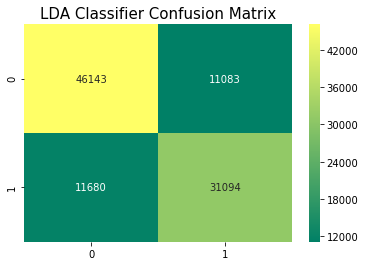

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()

print(lda_classifier)

lda_classifier.fit(x_train, y_train)

lda_prediction = lda_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the LDA Classifier is', round(accuracy_score(y_test, lda_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

lda_cv_score = cross_val_score(lda_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for LDA Classifier is:', round(lda_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(lda_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('LDA Classifier Confusion Matrix', y=1.05, size=15)


## LDA HyperParameters Tuning

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

lda_classifier = LinearDiscriminantAnalysis()

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {"solver": ["lsqr", "eigen"],
              "shrinkage": [0, 0.5, 1.0],
              "tol": [0.0001, 0.001, 0.01, 0.1]              
              }

lda_model = GridSearchCV(lda_classifier, param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

lda_model.fit(x_train, y_train)

# Best score
print(lda_model.best_score_)

# Best Estimator
lda_model.best_estimator_


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   32.0s finished


0.772225


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0,
              solver='lsqr', store_covariance=False, tol=0.0001)

## LDA with Best Parameters

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0,
              solver='lsqr', store_covariance=False, tol=0.0001)
-------------- The Accuracy of the model ----------------------------
The Accuracy of the LDA Classifier is 77.45
The cross validated score for LDA Classifier is: 77.24


Text(0.5, 1.05, 'LDA Classifier Confusion Matrix')

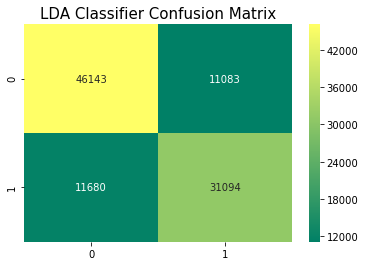

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0,
              solver='lsqr', store_covariance=False, tol=0.0001)

print(lda_classifier)

lda_classifier.fit(x_train, y_train)

lda_prediction = lda_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the LDA Classifier is', round(accuracy_score(y_test, lda_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

lda_cv_score = cross_val_score(lda_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for LDA Classifier is:', round(lda_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(lda_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('LDA Classifier Confusion Matrix', y=1.05, size=15)



## Gradient Boosting Classifier

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
-------------- The Accuracy of the model ----------------------------
The Accuracy of the GB Classifier is 77.27
The cross validated score for GB Classifier is: 77.3


Text(0.5, 1.05, 'GB Classifier Confusion Matrix')

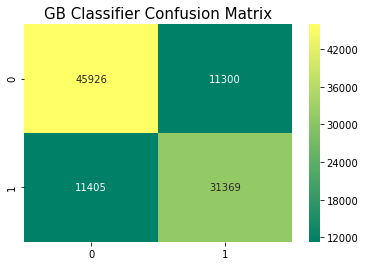

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()

print(gb_classifier)

gb_classifier.fit(x_train, y_train)

gb_prediction = gb_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the GB Classifier is', round(accuracy_score(y_test, gb_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

gb_cv_score = cross_val_score(gb_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for GB Classifier is:', round(gb_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(gb_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('GB Classifier Confusion Matrix', y=1.05, size=15)


## Gradient Boost HyperParameter Tuning

In [64]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# gb_classifier = GradientBoostingClassifier()
# param_grid = {'loss' : ["deviance"],
#               'n_estimators' : [100,200,300,400],
#               'learning_rate': [0.01, 0.1, 1.0],
#               'max_depth': [4, 8],
#               'min_samples_leaf': [100,150],
#               'max_features': [10, 17] 
#               }

# kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# gb_model = GridSearchCV(gb_classifier, param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# gb_model.fit(x_train, y_train)

# # Best score
# gb_model.best_score_

# # Best Estimator 
# gb_model.best_estimator_


In [65]:
# gb_model.best_estimator_.feature_importances_

In [66]:
# d = {'Stats':x_train.columns,'Feature':gb_model.best_estimator_.feature_importances_}
# df = pd.DataFrame(d)
# df

## Gradient Boost with Best Parameters

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=10, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=150, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
-------------- The Accuracy of the model ----------------------------
The Accuracy of the GB Classifier is 77.39
The cross validated score for GB Classifier is: 77.46


Text(0.5, 1.05, 'GB Classifier Confusion Matrix')

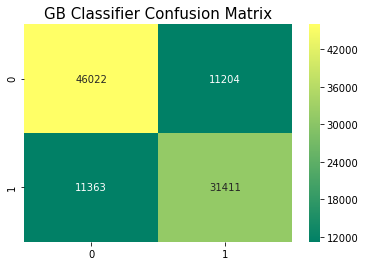

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=10, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=150, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

print(gb_classifier)

gb_classifier.fit(x_train, y_train)

gb_prediction = gb_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the GB Classifier is', round(accuracy_score(y_test, gb_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

gb_cv_score = cross_val_score(gb_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for GB Classifier is:', round(gb_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(gb_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('GB Classifier Confusion Matrix', y=1.05, size=15)



## Model Evaluation Scores

In [68]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 
              'RandomForestClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier', 
              'LinearDiscriminantAnalysis','GradientBoostingClassifier'],
    'Score': [lr_cv_score.mean(), rf_cv_score.mean(), dt_cv_score.mean(), 
              ada_cv_score.mean(), lda_cv_score.mean(), gb_cv_score.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
5,GradientBoostingClassifier,0.77462
4,LinearDiscriminantAnalysis,0.77237
0,LogisticRegression,0.77208
3,AdaBoostClassifier,0.77199
2,DecisionTreeClassifier,0.77104
1,RandomForestClassifier,0.76992


# Applying Feature Selection 

### Information Gain

In [69]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

importances = mutual_info_classif(x_train, y_train)
feat_importances = pd.Series(importances, x_train.columns[0:len(x_train.columns)])

In [70]:
feat_importances.sort_values(ascending=False)

male              0.136951
S                 0.076669
3                 0.050031
High_Fare         0.021744
Median_Fare       0.017538
Has_Ticket        0.011711
Parch             0.009698
Elder             0.007201
Median_Family     0.006750
2                 0.006135
Adult             0.005776
Q                 0.005239
Average_Fare      0.002497
Average_Family    0.001188
SibSp             0.000818
Big_Family        0.000582
Teenage           0.000000
dtype: float64

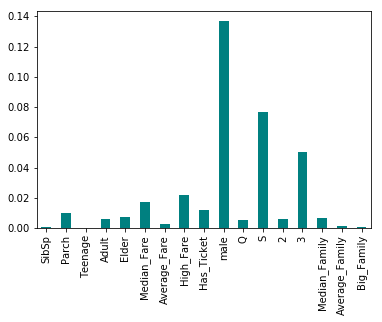

In [71]:
feat_importances.plot(kind="bar", color="teal")
plt.show()

In [72]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=6).fit(x_train, y_train)
x_train.columns[sel.get_support()]

Index(['Median_Fare', 'High_Fare', 'Has_Ticket', 'male', 'S', 3], dtype='object')

In [73]:
x_train_ig = sel.transform(x_train)
x_test_ig = sel.transform(x_test)
x_train_ig.shape, x_test_ig.shape

((80000, 6), (20000, 6))

### GradientBoostingClassifier

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
-------------- The Accuracy of the model ----------------------------
The Accuracy of the GB Classifier is 76.68
The cross validated score for GB Classifier is: 77.44


Text(0.5, 1.05, 'GB Classifier Confusion Matrix')

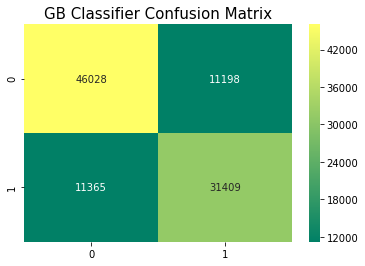

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features="auto", max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

print(gb_classifier)

gb_classifier.fit(x_train_ig, y_train)

gb_prediction = gb_classifier.predict(x_test_ig)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the GB Classifier is', round(accuracy_score(y_test, gb_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

gb_cv_score = cross_val_score(gb_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for GB Classifier is:', round(gb_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(gb_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('GB Classifier Confusion Matrix', y=1.05, size=15)

# Chi Square

In [75]:
from sklearn.feature_selection import chi2

importances = chi2(x_train, y_train)
feat_importances = pd.Series(importances[1], index=x_train.columns)
feat_importances.sort_values(ascending=True)

Median_Fare        0.000000e+00
High_Fare          0.000000e+00
male               0.000000e+00
S                  0.000000e+00
3                  0.000000e+00
2                 1.185273e-197
Elder             1.113640e-124
Adult             9.945706e-118
Q                 2.472928e-115
Median_Family      2.899951e-99
Average_Fare       5.391382e-57
Parch              3.536009e-20
Teenage            2.072378e-13
Average_Family     9.554453e-08
Has_Ticket         1.043135e-02
Big_Family         2.126790e-02
SibSp              7.873346e-02
dtype: float64

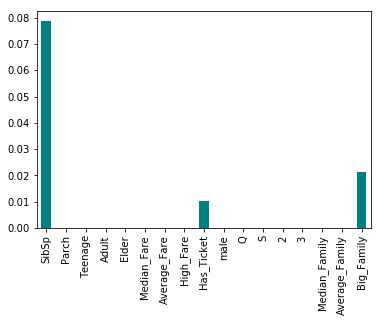

In [76]:
feat_importances.plot(kind="bar", color="teal")
plt.show()

In [77]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(chi2, k=14).fit(x_train, y_train)
x_train.columns[sel.get_support()]

Index([         'Parch',        'Teenage',          'Adult',          'Elder',
          'Median_Fare',   'Average_Fare',      'High_Fare',           'male',
                    'Q',              'S',                2,                3,
        'Median_Family', 'Average_Family'],
      dtype='object')

In [78]:
x_train_chi = sel.transform(x_train)
x_test_chi = sel.transform(x_test)
x_train_chi.shape, x_test_chi.shape

((80000, 14), (20000, 14))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
-------------- The Accuracy of the model ----------------------------
The Accuracy of the GB Classifier is 76.92
The cross validated score for GB Classifier is: 77.44


Text(0.5, 1.05, 'GB Classifier Confusion Matrix')

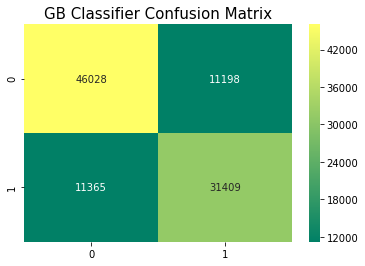

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features="auto", max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

print(gb_classifier)

gb_classifier.fit(x_train_chi, y_train)

gb_prediction = gb_classifier.predict(x_test_chi)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the GB Classifier is', round(accuracy_score(y_test, gb_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

gb_cv_score = cross_val_score(gb_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for GB Classifier is:', round(gb_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(gb_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('GB Classifier Confusion Matrix', y=1.05, size=15)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
-------------- The Accuracy of the model ----------------------------
The Accuracy of the GB Classifier is 77.52
The cross validated score for GB Classifier is: 77.44


Text(0.5, 1.05, 'GB Classifier Confusion Matrix')

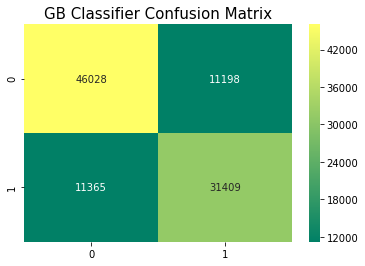

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features="auto", max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

print(gb_classifier)

gb_classifier.fit(x_train, y_train)

gb_prediction = gb_classifier.predict(x_test)

print('-------------- The Accuracy of the model ----------------------------')
print('The Accuracy of the GB Classifier is', round(accuracy_score(y_test, gb_prediction) * 100, 2))

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

gb_cv_score = cross_val_score(gb_classifier, training_feature, training_target, cv=kfold, scoring='accuracy')

print('The cross validated score for GB Classifier is:', round(gb_cv_score.mean() * 100, 2))

y_pred = cross_val_predict(gb_classifier, training_feature, training_target, cv=kfold)

sns.heatmap(confusion_matrix(training_target, y_pred), annot=True, fmt='3.0f', cmap="summer")

plt.title('GB Classifier Confusion Matrix', y=1.05, size=15)

In [81]:
submission = pd.read_csv("data/Tabular Playground Series - Apr 2021/sample_submission.csv")

In [82]:
y_pred = gb_classifier.predict(org_test_data)

In [83]:
export_df = pd.DataFrame()
export_df["PassengerId"] = org_test_pssg_id
export_df["Survived"] = y_pred
export_df.to_csv("data/Tabular Playground Series - Apr 2021/my_gb_classifier_submission.csv", index=False)

In [84]:
export_df

,PassengerId,Survived
0,100000,0
1,100001,0
2,100002,1
3,100003,0
4,100004,1
5,100005,0
6,100006,0
7,100007,0
8,100008,1
9,100009,0


# ANN

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, regularizers # Importing sequential model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout # Importing layers

In [86]:
x_train_ig.shape[1], x_test_ig.shape[1]

(6, 6)

In [104]:
def annModel(x_train, y_train, x_test, y_test, batch, epochs):
    model = Sequential()

    model.add(Dense(x_train.shape[1], activation="relu", input_dim=x_train.shape[1], kernel_regularizer=regularizers.l2(0.01)))
        
    model.add(Dense(64, activation="relu"))

    model.add(BatchNormalization())

    model.add(Dense(32, activation="relu"))
    
    model.add(Dense(1, activation="sigmoid"))
    
    model.summary()
    
    model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
    
    model.fit(x_train, y_train, batch_size=batch, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    
    return model

In [88]:
annModel(x_train_ig, y_train, x_test_ig, y_test, 10, 10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,987
Trainable params: 2,795
Non-trainable params: 192
_________________________________________________________________
Train 

In [89]:
annModel(x_train_chi, y_train, x_test_chi, y_test, 10, 10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                960       
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,667
Trainable params: 3,475
Non-trainable params: 192
_________________________________________________________________
Train 

In [90]:
x_train["male"].shape

(80000,)

In [105]:
ann_model = annModel(x_train, y_train, x_test, y_test, 10, 10)
ann_model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 17)                306       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                1152      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 1,523
Trainable params: 1,523
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 38s 469us/step - loss: 0.5163 - acc: 0.7670 - val_loss: 0.4981 - val_acc: 0.7696
Epoch 2/10
80000/80000 [==============================] - 36s 456us/step - loss: 0.4972 - acc: 0.7703 - val_loss: 0.4959 - val_acc: 0.7714
Epoch 3/10
80000/80000 [==============================] - 36s 453us/step - l

In [92]:
org_test_data.head()

,SibSp,Parch,Teenage,Adult,Elder,Median_Fare,Average_Fare,High_Fare,Has_Ticket,male,Q,S,2,3,Median_Family,Average_Family,Big_Family
0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0
1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0
4,0,2,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [93]:
y_pred = ann_model.predict_classes(org_test_data)

In [94]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [95]:
org_test_pssg_id.head()

0    100000
1    100001
2    100002
3    100003
4    100004
Name: PassengerId, dtype: int64

In [96]:
submission = pd.read_csv("data/Tabular Playground Series - Apr 2021/sample_submission.csv")

In [97]:
submission.head()

,PassengerId,Survived
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1


In [98]:
export_df = pd.DataFrame()
export_df["PassengerId"] = org_test_pssg_id
export_df["Survived"] = y_pred
export_df.to_csv("data/Tabular Playground Series - Apr 2021/my_submission.csv", index=False)

In [99]:
export_df

,PassengerId,Survived
0,100000,0
1,100001,0
2,100002,1
3,100003,0
4,100004,1
5,100005,0
6,100006,1
7,100007,0
8,100008,1
9,100009,0
